In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/chatgpt-sentiment-analysis/file.csv")
df.shape

(219294, 3)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [3]:
df = df.drop([df.columns[0]], axis=1)
df.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [4]:
df.duplicated().sum()

1671

In [5]:
df.drop_duplicates(inplace=True)
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217623 entries, 0 to 219293
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweets  217623 non-null  object
 1   labels  217623 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


<Axes: xlabel='labels', ylabel='count'>

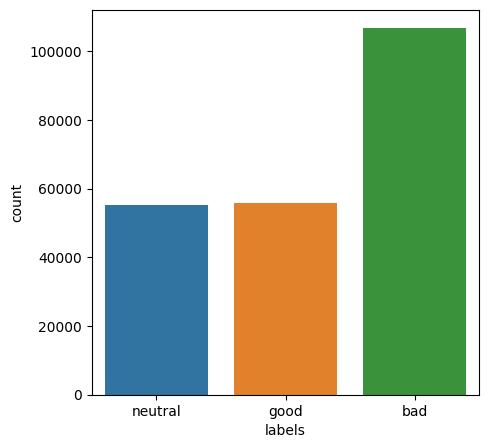

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.countplot(x='labels', data = df)

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    text = re.sub(r"\s+", ' ', text)
    text = re.sub(r"https\S+|www\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text_tokens = word_tokenize(text)
    words = [stemmer.stem(word) for word in text_tokens]  
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)
    return text.strip()


df.insert(len(df.columns)-1, "myTweets", df['tweets'].apply(preprocess_text))
df.head()

,tweets,myTweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optim languag model dialogu openai,neutral
1,"Try talking with ChatGPT, our new AI system wh...",tri talk chatgpt new ai system optim dialogu f...,good
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optim languag model dialogu ai machine...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",thrill share chatgpt new model optim dialog pu...,good
4,"As of 2 minutes ago, @OpenAI released their ne...",minut ago openai releas new chatgpt nnand use ...,bad


In [8]:

from tensorflow.keras.layers import TextVectorization
import tensorflow as tf

MAX_FEATURES = 7000
MAX_SEQUENCE_LENGTH = 150

vectorizer = TextVectorization(
    max_tokens=MAX_FEATURES,
    output_sequence_length=MAX_SEQUENCE_LENGTH,
    output_mode='int'
)
vectorizer.adapt(df['myTweets'].values)
vectorized_text = vectorizer(df['myTweets'].values)

df = df.reset_index()

df.insert(len(df.columns)-1, "myTweetsNum", vectorized_text.numpy().tolist())

df.head()

2024-05-08 16:52:40.861196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 16:52:40.861326: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 16:52:40.976987: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


,index,tweets,myTweets,myTweetsNum,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optim languag model dialogu openai,"[2, 586, 60, 47, 637, 6, 0, 0, 0, 0, 0, 0, 0, ...",neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",tri talk chatgpt new ai system optim dialogu f...,"[25, 66, 2, 11, 3, 206, 586, 637, 682, 41, 92,...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optim languag model dialogu ai machine...,"[2, 586, 60, 47, 637, 3, 172, 368, 1891, 1431,...",neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",thrill share chatgpt new model optim dialog pu...,"[2520, 238, 2, 11, 47, 586, 2546, 529, 186, 24...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",minut ago openai releas new chatgpt nnand use ...,"[360, 518, 6, 192, 11, 2, 1558, 5, 106, 0, 0, ...",bad


In [9]:
from sklearn.preprocessing import LabelEncoder

myLabel = LabelEncoder()
df.insert(len(df.columns), "myLabel", myLabel.fit_transform(df['labels']))
df.head()

,index,tweets,myTweets,myTweetsNum,labels,myLabel
0,0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optim languag model dialogu openai,"[2, 586, 60, 47, 637, 6, 0, 0, 0, 0, 0, 0, 0, ...",neutral,2
1,1,"Try talking with ChatGPT, our new AI system wh...",tri talk chatgpt new ai system optim dialogu f...,"[25, 66, 2, 11, 3, 206, 586, 637, 682, 41, 92,...",good,1
2,2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optim languag model dialogu ai machine...,"[2, 586, 60, 47, 637, 3, 172, 368, 1891, 1431,...",neutral,2
3,3,"THRILLED to share that ChatGPT, our new model ...",thrill share chatgpt new model optim dialog pu...,"[2520, 238, 2, 11, 47, 586, 2546, 529, 186, 24...",good,1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",minut ago openai releas new chatgpt nnand use ...,"[360, 518, 6, 192, 11, 2, 1558, 5, 106, 0, 0, ...",bad,0


In [10]:
from sklearn.model_selection import train_test_split

X = df['myTweetsNum']
y = df['myLabel'].values

# Splitting data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training data into 90% train and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [11]:
import numpy as np

X_train = np.asarray(X_train.tolist())
X_train = X_train.astype(np.int32)
X_val = np.asarray(X_val.tolist()) 
X_val = X_val.astype(np.int32) 
X_test = np.asarray(X_test.tolist()).astype(np.int32)
y_train = np.asarray(y_train.tolist()).astype(np.int32)
y_val = np.asarray(y_val.tolist()).astype(np.int32)
y_test = np.asarray(y_test.tolist()).astype(np.int32)


In [12]:
#  CNN MODEL

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

modelCNN = Sequential()
modelCNN.add(Embedding(input_dim=MAX_FEATURES,output_dim=128, input_length=MAX_SEQUENCE_LENGTH , trainable = True))
modelCNN.add(Conv1D(filters=6, kernel_size=3, activation='relu'))
modelCNN.add(MaxPooling1D(pool_size=2))
modelCNN.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
modelCNN.add(MaxPooling1D(pool_size=2))
modelCNN.add(Flatten())
modelCNN.add(Dense(120, activation='relu'))
modelCNN.add(Dense(84, activation='relu'))
modelCNN.add(Dense(3, activation='softmax'))

adam = Adam(learning_rate=0.001)
modelCNN.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.0001)

historyCNN = modelCNN.fit(X_train, y_train,epochs=15,batch_size=64,validation_data=(X_val, y_val),verbose=2, callbacks=[reduce_lr])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15


I0000 00:00:1715187184.652450     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2449/2449 - 18s - 7ms/step - accuracy: 0.8206 - loss: 0.4711 - val_accuracy: 0.8640 - val_loss: 0.3919 - learning_rate: 0.0010
Epoch 2/15
2449/2449 - 8s - 3ms/step - accuracy: 0.8750 - loss: 0.3551 - val_accuracy: 0.8602 - val_loss: 0.3855 - learning_rate: 0.0010
Epoch 3/15
2449/2449 - 8s - 3ms/step - accuracy: 0.8887 - loss: 0.3174 - val_accuracy: 0.8634 - val_loss: 0.3796 - learning_rate: 0.0010
Epoch 4/15

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2449/2449 - 8s - 3ms/step - accuracy: 0.9010 - loss: 0.2857 - val_accuracy: 0.8607 - val_loss: 0.3897 - learning_rate: 0.0010
Epoch 5/15
2449/2449 - 8s - 3ms/step - accuracy: 0.9208 - loss: 0.2338 - val_accuracy: 0.8581 - val_loss: 0.4217 - learning_rate: 5.0000e-04
Epoch 6/15
2449/2449 - 8s - 3ms/step - accuracy: 0.9314 - loss: 0.2088 - val_accuracy: 0.8536 - val_loss: 0.4509 - learning_rate: 5.0000e-04
Epoch 7/15

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
2449/2449 - 8s 

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.optimizers import SGD

# LSTM MODEL

modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_SEQUENCE_LENGTH, trainable=True))
modelLSTM.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=l2(0.01))))
modelLSTM.add(Dense(256, activation='relu'))
modelLSTM.add(Dropout(0.5))  
modelLSTM.add(Dense(3, activation='softmax'))

# adam = Adam(learning_rate=0.001)
sgd = SGD(learning_rate=0.01, momentum=0.9)
modelLSTM.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

historyLSTM = modelLSTM.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_val, y_val), verbose=2, callbacks=[early_stop])



Epoch 1/15
2449/2449 - 748s - 305ms/step - accuracy: 0.5405 - loss: 1.3318 - val_accuracy: 0.6200 - val_loss: 0.8684
Epoch 2/15
2449/2449 - 743s - 303ms/step - accuracy: 0.6638 - loss: 0.8095 - val_accuracy: 0.7472 - val_loss: 0.6763
Epoch 3/15
2449/2449 - 791s - 323ms/step - accuracy: 0.7583 - loss: 0.6494 - val_accuracy: 0.7772 - val_loss: 0.6045
Epoch 4/15
2449/2449 - 732s - 299ms/step - accuracy: 0.7830 - loss: 0.5922 - val_accuracy: 0.8096 - val_loss: 0.5405
Epoch 5/15
2449/2449 - 732s - 299ms/step - accuracy: 0.7927 - loss: 0.5684 - val_accuracy: 0.5693 - val_loss: 0.9180
Epoch 6/15
2449/2449 - 731s - 298ms/step - accuracy: 0.8011 - loss: 0.5502 - val_accuracy: 0.8254 - val_loss: 0.5034
Epoch 7/15
2449/2449 - 726s - 297ms/step - accuracy: 0.8058 - loss: 0.5395 - val_accuracy: 0.8180 - val_loss: 0.5223
Epoch 8/15
2449/2449 - 721s - 295ms/step - accuracy: 0.8103 - loss: 0.5314 - val_accuracy: 0.8290 - val_loss: 0.4977
Epoch 9/15
2449/2449 - 731s - 298ms/step - accuracy: 0.8144 - lo

In [22]:

test_loss, test_accuracy = modelCNN.evaluate(X_test, y_test, batch_size=64, verbose=0)
print("CNN Model ==> Test Loss, Test Accuracy:")
print(test_loss, test_accuracy)

test_loss, test_accuracy = modelLSTM.evaluate(X_test, y_test, batch_size=64, verbose=0)
print("LSTM Model ==> Test Loss, Test Accuracy:")
print(test_loss, test_accuracy)

CNN Model ==> Test Loss, Test Accuracy:
0.7943171262741089 0.8399081230163574
LSTM Model ==> Test Loss, Test Accuracy:
0.4553498923778534 0.8485927581787109
